In [52]:

#ref :  http://www.neural.cz/dataset-exploration-boston-house-pricing.html

#ref :  https://archive.ics.uci.edu/ml/datasets/Housing

#ref : http://facweb.cs.depaul.edu/mobasher/classes/csc478/Notes/IPython%20Notebook%20-%20Regression.html

#ref : http://facweb.cs.depaul.edu/mobasher/classes/csc478/Notes/IPython%20Notebook%20-%20Regression.html

In [53]:
from sklearn.datasets import load_boston
import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
from sklearn.datasets import load_boston
import pylab as pl
import matplotlib.pyplot as plt



from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [54]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

In [55]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
Y=df['target']

In [58]:
# Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.8, random_state=33)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


print('Coefficients: \n', regr.coef_)

print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test) - y_test) ** 2))

print('Variance score: %.2f' % regr.score(X_test, y_test))


Coefficients: 
 [ -1.10180752e-01   5.00734271e-02   2.99120554e-02   3.00971741e+00
  -1.53865705e+01   4.03305527e+00  -1.35254648e-03  -1.54347630e+00
   3.22467189e-01  -1.35298720e-02  -8.39040875e-01   8.85778956e-03
  -5.84537310e-01]
Residual sum of squares: 22.04
Variance score: 0.69


[0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.5602410857

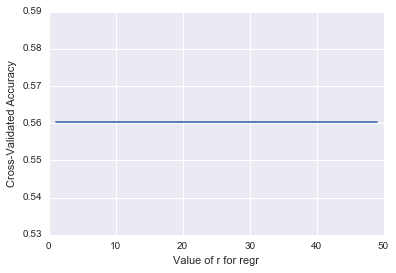

In [59]:

r_range = range(1,50)
r_scores = []
for r in r_range:
    
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    scores = cross_val_score(regr, X_test, y_test)
    r_scores.append(scores.mean())

print (r_scores) 

plt.plot(r_range, r_scores)
plt.xlabel('Value of r for regr')
plt.ylabel('Cross-Validated Accuracy')

In [60]:
y_train.shape

(404,)

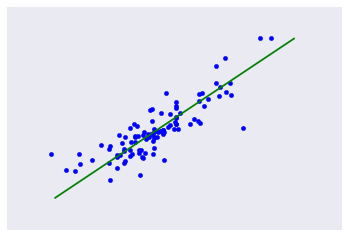

In [61]:
# Plot outputs
plt.scatter(regr.predict(X_test), y_test,  color='blue')
plt.plot([0,50],[0,50], 'g-')


plt.xticks(())
plt.yticks(())

plt.show()

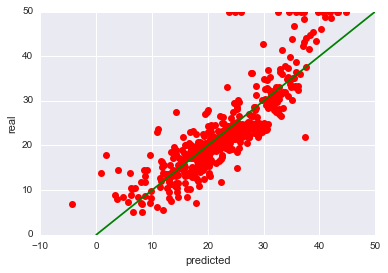

In [62]:
x = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target


x= pd.DataFrame(x)
linreg = LinearRegression()
linreg.fit(x,y)
p = linreg.predict(x)
err = abs(p-y)

# Plot outputs
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64


(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

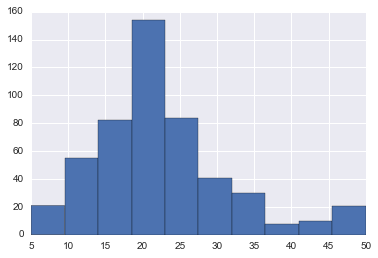

In [63]:
print (df['target'].describe())


plt.hist(df['target'])

# Set up possible group for classificarion 

In [64]:
def house_classify(x):
    if x  >=0 and  x  < 13:
        return 'cheap'
    elif  x  >=  13 and  x  < 31:
        return 'medium'
    elif  x  >=  31:
        return 'expensive'

In [65]:
df['price'] = df['target'].apply(lambda x: house_classify(x))

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,medium
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,medium
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,expensive
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,expensive
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,expensive


In [66]:
#df_=df.copy()
df_= df.drop(['target'],axis=1)
df_.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,medium
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,medium
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,expensive
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,expensive
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,expensive


#  Relative feature importances

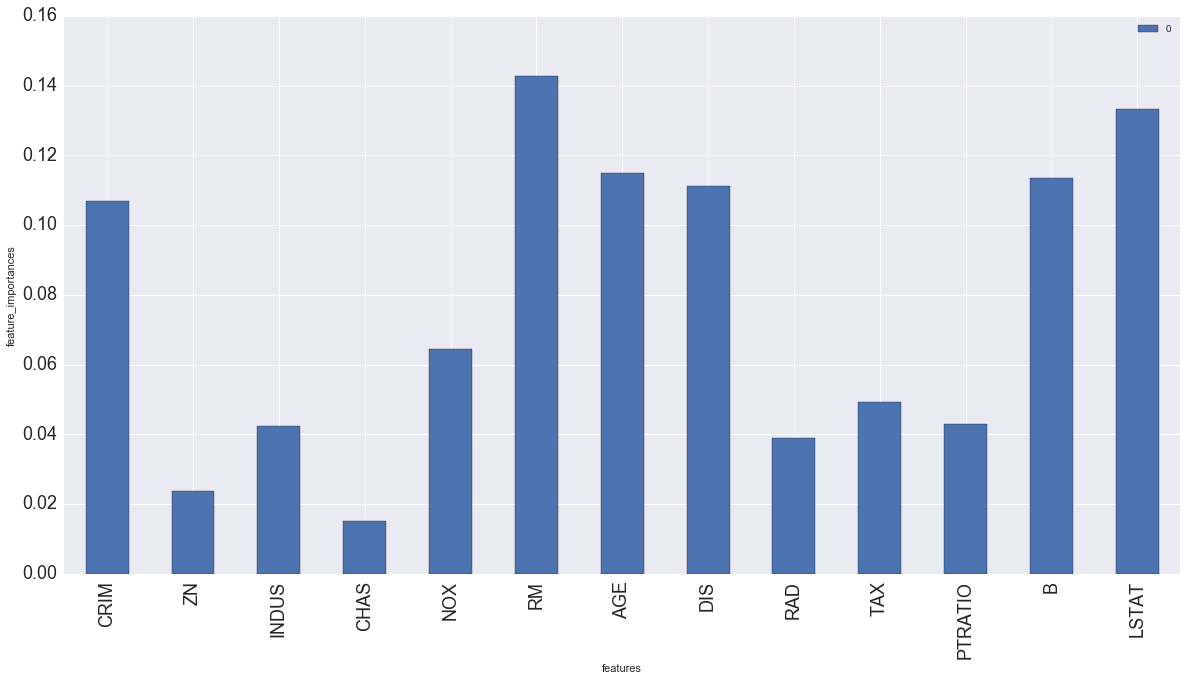

In [72]:
#  relative feature importances



X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

Y = np.array(Y).astype(int)



clf = ExtraTreesClassifier()
clf = clf.fit(X, Y)
clf.feature_importances_ 

df_feature = pd.DataFrame(clf.feature_importances_ )
df_feature.index =[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
pd.DataFrame(df_feature).plot(kind='bar',figsize=(20, 10),fontsize=18) 
pyplot.xlabel('features')
pyplot.ylabel('feature_importances')

# KNN

In [73]:

#X = data[['Fare','Pclass', 'Age']]
#y = data['Survived']


X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
#Y = np.asarray(df['target'], dtype="|S6")
Y = np.asarray(df['price'])
knn = KNeighborsClassifier(n_neighbors=3)


knn.fit( X, Y)


scores_1 = cross_val_score(knn, X, Y, cv=10)
#scores_2 = cross_val_score(knn, df_test_feature[['outcome']], knn.predict(df_test_feature[['total_number_bid_bidder_made','avg_number_bid_bidder_made','gap_time_max_min']]),cv=10)
print (scores_1)
#print (scores_2)

[ 0.75        0.69230769  0.76470588  0.68627451  0.78431373  0.68627451
  0.80392157  0.57142857  0.51020408  0.73469388]


[0.77262860026017921,
 0.7516844780002675,
 0.7670055683213578,
 0.75647560515981582,
 0.79674350463824151,
 0.79469307364044206,
 0.78943386706544594,
 0.78964754227912126,
 0.78963994358731193,
 0.79234264629001472,
 0.80031975295133184,
 0.79775565038722929,
 0.78686976450134338,
 0.78963963963963957,
 0.77647080278659231,
 0.76871101871101866,
 0.7656520893362998,
 0.77091524723103677,
 0.77299242562400461,
 0.78608649134964925,
 0.77306354937933885,
 0.78089445721024675,
 0.77071312202891151,
 0.77064564564564564,
 0.76787181918760872,
 0.76787181918760872,
 0.76274361405940361,
 0.76530771662350616,
 0.76011203511203518]

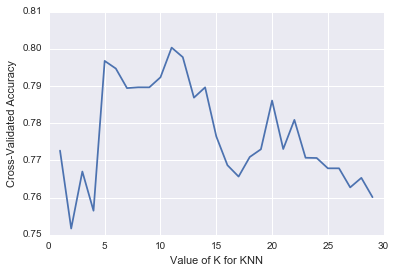

In [74]:
k_range = range(1,30)
k_scores = []
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
#Y = np.asarray(df['target'], dtype="|S6")
Y = np.asarray(df['price'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=33)

for k in k_range:
	knn = KNeighborsClassifier(n_neighbors=k)
	scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
	k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

k_scores

In [75]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit( X, Y)
knn.predict(X_test)

print (knn.score(X,Y))

pd.DataFrame({'predict':knn.predict(X_test),'actual':y_test})

0.851778656126


,actual,predict
0,medium,medium
1,cheap,cheap
2,medium,medium
3,cheap,medium
4,medium,medium
5,medium,medium
6,expensive,expensive
7,medium,medium
8,expensive,expensive
9,medium,medium


In [76]:
# KNN  Neigh


X = df[['CRIM', 'RM', 'AGE', 'DIS', 'LSTAT']]
Y = np.asarray(df['target'])


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

pd.DataFrame({'predict':neigh.predict(X_test), 'actual':y_test, 'predict_error':neigh.predict(X_test)-y_test})

,actual,predict,predict_error
0,10.9,9.50,-1.40
1,30.1,32.30,2.20
2,29.8,22.20,-7.60
3,23.8,20.70,-3.10
4,24.8,27.80,3.00
5,23.9,29.00,5.10
6,22.8,30.10,7.30
7,20.1,20.80,0.70
8,14.6,14.80,0.20
9,16.1,15.05,-1.05


In [77]:
X

,CRIM,RM,AGE,DIS,LSTAT
0,0.00632,6.575,65.2,4.0900,4.98
1,0.02731,6.421,78.9,4.9671,9.14
2,0.02729,7.185,61.1,4.9671,4.03
3,0.03237,6.998,45.8,6.0622,2.94
4,0.06905,7.147,54.2,6.0622,5.33
5,0.02985,6.430,58.7,6.0622,5.21
6,0.08829,6.012,66.6,5.5605,12.43
7,0.14455,6.172,96.1,5.9505,19.15
8,0.21124,5.631,100.0,6.0821,29.93
9,0.17004,6.004,85.9,6.5921,17.10


[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


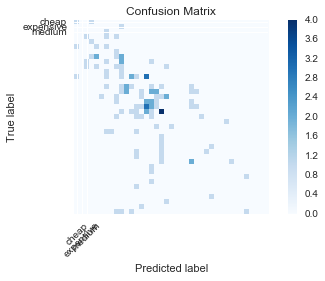

In [83]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title('Confusion Matrix')
    fig.colorbar(im)

    target_names = ['cheap', 'expensive','medium']

    tick_marks = np.arange(len(target_names))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(target_names, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(target_names)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.tight_layout()
    

    
X = df[['CRIM', 'ZN']]    
Y = np.array(Y).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
#print('Accuracy on Training Set: {:.3f}'.format(knn.score(X, y)))

cm = confusion_matrix(y_test, y_test_pred)
print(cm)
plot_confusion_matrix(cm)

In [80]:
dd=pd.DataFrame({'predict':knn.predict(X_test),'actual':y_test})
dd.groupby('predict').count()

,actual
predict,
5,1
6,2
7,2
8,6
10,1
12,3
13,3
14,4
15,13


/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=20.
  % (min_labels, self.n_folds)), Warning)
/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


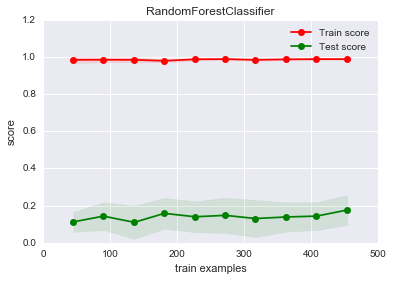

In [81]:
#Learning Curve - Forest

forest = RF()

# transform y from flaot to integer 
# ref https://www.kaggle.com/c/stumbleupon/forums/t/6132/problems-with-feature-selection
y = np.array(y).astype(int)



train_sizes, train_scores, test_scores = learning_curve(forest, X, y, cv=20,train_sizes=np.linspace(.1, 1., 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("RandomForestClassifier")
plt.legend(loc="best")
plt.xlabel("Train examples")
plt.ylabel("Score")
#plt.ylim((0.1, 1.5))
#plt.gca().invert_yaxis()



plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Train score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")


plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.xlabel('train examples')
plt.ylabel('score')
plt.title("RandomForestClassifier")
plt.legend(loc="best")

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=20.
  % (min_labels, self.n_folds)), Warning)
/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


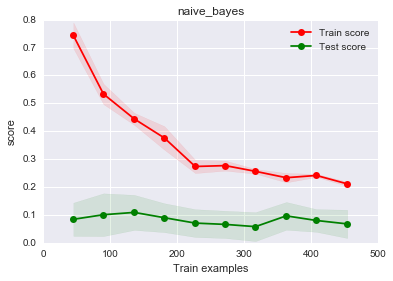

In [82]:
# Learning Curve - naive_bayes


# transform y from flaot to integer 
# ref https://www.kaggle.com/c/stumbleupon/forums/t/6132/problems-with-feature-selection
y = np.array(y).astype(int)



train_sizes, train_scores, test_scores = learning_curve(GaussianNB(), X, y, cv=20,train_sizes=np.linspace(.1, 1., 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("naive_bayes")
plt.legend(loc="best")
plt.xlabel("Train examples")
plt.ylabel("Score")
#plt.ylim((0.1, 1.5))



plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Train score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")

# Plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.xlabel('Train examples')
plt.ylabel('score')
plt.title("naive_bayes")
plt.legend(loc="best")